<a href="https://colab.research.google.com/github/nurulshifaside/Data-Science-Tasks/blob/main/2nd%20Task/Machine%20Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Data, Data Checking, Imbalance Data

In [ ]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
lokasi_file_csv = '/content/drive/MyDrive/stupen/heart.csv'
heart = pd.read_csv(lokasi_file_csv)
print(heart)

      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      52    1   0       125   212    0        1      168      0      1.0   
1      53    1   0       140   203    1        0      155      1      3.1   
2      70    1   0       145   174    0        1      125      1      2.6   
3      61    1   0       148   203    0        1      161      0      0.0   
4      62    0   0       138   294    1        1      106      0      1.9   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  target  
0         2   2     3       0  
1         0

In [ ]:
#Cek Missing Value
heart.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Tidak terdapat missing value pada data ini.

Pada assignment sebelumnya, data duplikat pada data ini telah dihapus. Oleh karena itu, assignment ini menggunakan data bersih yang telah dilakukan sebelumnya.

In [ ]:
duplikat = heart.duplicated()
duplikat

#Menghapus data duplikat
data = heart.drop_duplicates()
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1
733,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1
739,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0
843,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0


In [ ]:
#Info Data
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 302 entries, 0 to 878
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trestbps  302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalach   302 non-null    int64  
 8   exang     302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slope     302 non-null    int64  
 11  ca        302 non-null    int64  
 12  thal      302 non-null    int64  
 13  target    302 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 35.4 KB


Feature yang akan digunakan ialah "target".

0 = tidak menderita kelainan jantung

1 = menderita kelainan jantung

In [ ]:
#Imbalance Data
data['target'].value_counts()

target
1    164
0    138
Name: count, dtype: int64

In [ ]:
data['target'].value_counts(normalize=True)

target
1    0.543046
0    0.456954
Name: proportion, dtype: float64

Informasi di atas menunjukkan perbandingan jumlah nilai 0 dan 1 yang dapat dikatakan mendekati balance. Untuk melihat secara visual, berikut bar chart dan pie chart dataset di atas.

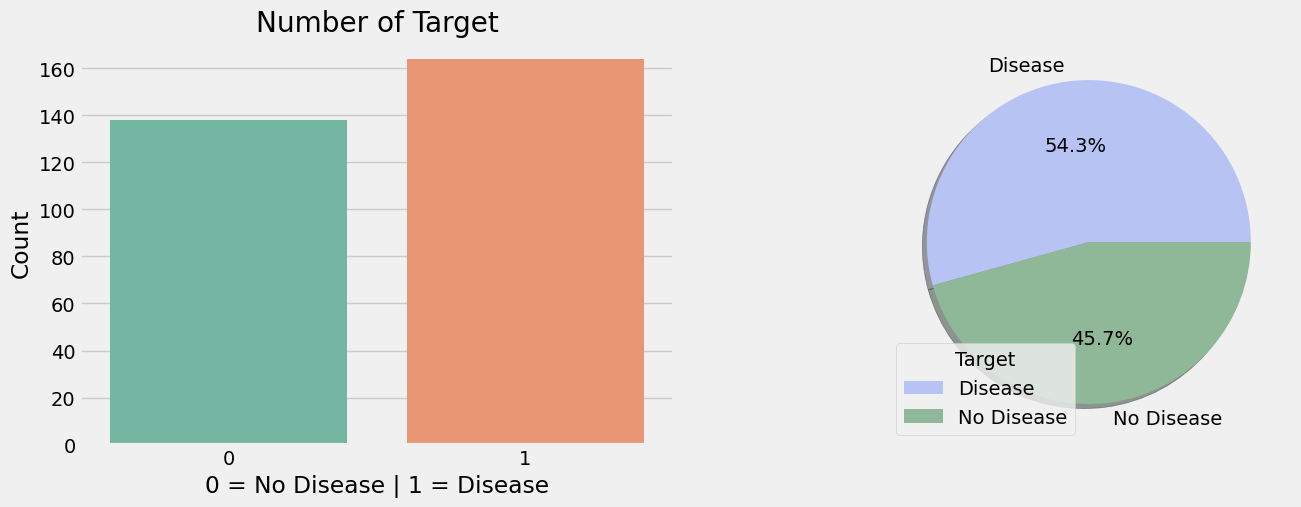

In [ ]:
#Visualize number of target values in dataset
plt.figure(figsize=(15,5))

#Create barchart showing count of target value
plt.subplot(1, 2, 1)
sns.countplot(x="target", data = data, palette = "Set2")
plt.title("Number of Target")
plt.xlabel("0 = No Disease | 1 = Disease")
plt.ylabel("Count")

#Create piechart showing count of target value
plt.subplot(1, 2, 2)
plt.pie(data["target"].value_counts(), labels = ["Disease", "No Disease"], shadow = True, autopct = "%1.1f%%", colors = ["#B7C3F3", "#8EB897"])
plt.legend(title = "Target")


Pada visualisasi data di atas menunjukkan perbandingan jumlah nilai 0 (No Disease) dan 1 (Disease) dapat dikatakan mendekati balance sehingga tidak perlu dilakukan penanganan. Plot di atas juga menunjukkan banyaknya pasien yang menderita penyakit jantung.

# Determinasi Machine Learning

Mencoba beberapa model machine learning dan memilih model terbaik berdasarkan hasil prediksi tertinggi.

In [ ]:
#Select relevant features and target variable
x = data.drop('target', axis = 1)
y = data.target

Membagi dataset menjadi data training dan data test dengan rasio 80:20.

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test =train_test_split(x,y, train_size=0.8)
print(x_train.shape, x_test.shape)

(241, 13) (61, 13)


Didapatkan pada data ada 241 data training dan 61 data test.

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Create a random forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

#Train the classifier
rf_classifier.fit(x_train, y_train)

#Make predictions on the test set
y_pred = rf_classifier.predict(x_test)

#Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

#Print the results
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n", classification_rep)

Accuracy: 0.84

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.78      0.83        32
           1       0.79      0.90      0.84        29

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61



Pada model Random Forest didapatkan akurasi prediksi yaitu 0.84.

# SVM

In [ ]:
from sklearn import datasets

In [ ]:
#Import SVM model
from sklearn import svm

x_train, X_test, y_train, y_test =train_test_split(x,y, train_size=0.8)

#Create a SVM Classifier
clf = svm.SVC(kernel='linear')
#Train model using the training sets
clf.fit(x_train, y_train)
#Predict the response for the test dataset
y_pred = clf.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[ 5, 18],
       [17, 21]])

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.23      0.22      0.22        23
           1       0.54      0.55      0.55        38

    accuracy                           0.43        61
   macro avg       0.38      0.39      0.38        61
weighted avg       0.42      0.43      0.42        61



Pada model SVM didapatkan akurasi prediksi yaitu 0.43

# KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import pickle

x_train, x_test, y_train, y_test =train_test_split(x,y, train_size=0.8)

model = KNeighborsClassifier()
model.fit(x_train, y_train)
y_pred=model.predict(x_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.56      0.52      0.54        27
           1       0.64      0.68      0.66        34

    accuracy                           0.61        61
   macro avg       0.60      0.60      0.60        61
weighted avg       0.60      0.61      0.60        61

[[14 13]
 [11 23]]


Pada model KNN didapatkan akurasi prediksi yaitu 0.61.



# Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
import pickle

x_train, x_test, y_train, y_test =train_test_split(x,y, train_size=0.8)

model=DecisionTreeClassifier()
model.fit(x_train, y_train)
y_pred=model.predict(x_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.70      0.71        30
           1       0.72      0.74      0.73        31

    accuracy                           0.72        61
   macro avg       0.72      0.72      0.72        61
weighted avg       0.72      0.72      0.72        61

[[21  9]
 [ 8 23]]


Pada model Decision Tree didapatkan akurasi prediksi yaitu 0.72.

Berdasarkan beberapa percobaan model machine learning diatas, yaitu Random Forest, SVM, KNN, dan Decision Tree masing-masing menghasilkan nilai akurasi sebesar 0.84, 0.43, 0.61, dan 0.72.

Akurasi prediksi yang paling tinggi ialah model Random Forest sebesar 0.84 sehingga model terbaik yang digunakan adalah **Random Forest**.

# Cross Validation pada Random Forest




In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier

x,y = data.drop('target', axis=1), data.target
model = RandomForestClassifier(n_estimators=100)
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(model, x, y, cv=kfold)

print("Cross-Validation Scrores:", scores)
print("Mean Accuracy:", scores.mean())

Cross-Validation Scrores: [0.85245902 0.78688525 0.81666667 0.83333333 0.81666667]
Mean Accuracy: 0.8212021857923497


Cross validation pada model random forest kasus ini sebesar 0.821.

Berdasarkan hasil di atas terdapat variasi dalam performa model di setiap lipatan validasi, mamun rata-rata akurasi masih tergolong cukup tinggi sehingga model masih cukup konsisten dalam melakukan prediksi data.

rata-rata akurasi yang cukup tinggi menunjukkan nmodel memiliki kemampuan untuk mempelajari pola data dan dapat menerapkannya pada data baru.

# Learning Curve

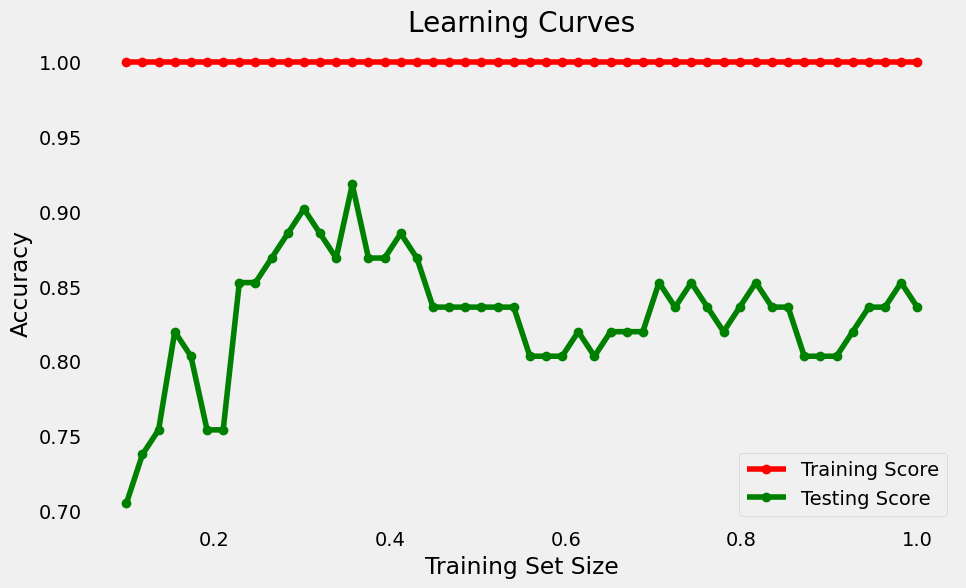

In [ ]:
# Import necessary libraries
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

x,y = data.drop('target', axis=1), data.target

# Split the data into a training set and a testing set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

#used to devide
train_sizes = np.linspace(0.1, 1, 50)
learning_curve_train = []
learning_curve_test = []

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

for train_size in train_sizes:
    num_samples = int(train_size * len(x_train))
    x_subset = x_train[:num_samples]
    y_subset = y_train[:num_samples]

    rf_classifier.fit(x_subset, y_subset)

    y_pred_train = rf_classifier.predict(x_subset)
    acc_train = accuracy_score(y_subset, y_pred_train)
    learning_curve_train.append(acc_train)

    y_pred_test = rf_classifier.predict(x_test)
    acc_test = accuracy_score(y_test, y_pred_test)
    learning_curve_test.append(acc_test)

# Plot Learning Curves
plt.figure(figsize=(10, 6))
plt.title('Learning Curves')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.grid()
plt.plot(train_sizes, learning_curve_train, 'o-', color="r", label="Training Score")
plt.plot(train_sizes, learning_curve_test, 'o-', color="g", label="Testing Score")
plt.legend(loc="best")
plt.show()

Learning Curves di atas menunjukkan overfitting data. Hal ini dapat dilihat pada jarak antara nilai akurasi tarining dan testing yang jauh tetapi stabil. Hal ini bisa terjadi karena banyaknya data validasi yang tidak muncul pada training data atau mungkin saja karena model yang dipilih terlalu kompleks.

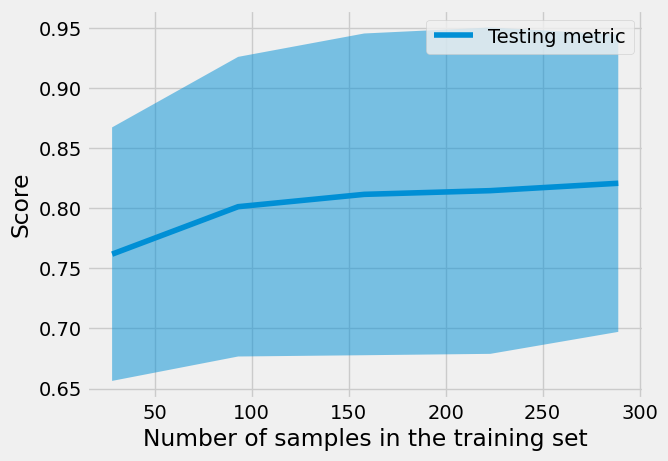

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import LearningCurveDisplay, learning_curve
from sklearn.ensemble import RandomForestClassifier

train_sizes, train_scores, test_scores = learning_curve(
    rf_classifier, x, y, cv=25)
display = LearningCurveDisplay(train_sizes=train_sizes,
    train_scores=train_scores, test_scores=test_scores, score_name="Score")
display.plot()
plt.show()

Lebih lanjut, visualisasi data di atas menunjukkan data mengalami overfitting.

# Hyperparameter Tuning & Bootstraping

Langkah ini dilakukan untuk mengatasi overfitting dan meningkatkan akurasi.

In [ ]:
#Bootstrapping

from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import numpy as np

# Misalkan Anda memiliki dataset
x, y = make_classification(n_samples=1000, n_features=20, random_state=42)

# Membagi dataset menjadi data pelatihan dan data uji
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Menentukan jumlah pohon dalam Random Forest
n_estimators = 100

# Menentukan model Random Forest dengan bootstrapping
rf_classifier = RandomForestClassifier(n_estimators=n_estimators, bootstrap=True, random_state=42)

# Melatih model Random Forest
rf_classifier.fit(x_train, y_train)

# Membuat prediksi pada data uji
y_pred = rf_classifier.predict(x_test)

# Evaluasi performa model
accuracy = np.mean(y_pred == y_test)
print("Accuracy:", accuracy)

Accuracy: 0.9


In [ ]:
#Hyperparameter Tuning

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

x = data.drop('target', axis=1)
y = data.target

# Split the data into a training set and a testing set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
rf_classifier = RandomForestClassifier()

# Definisikan grid parameter yang akan dijelajahi
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Buat objek GridSearchCV
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Lakukan penyetelan hiperparameter pada data pelatihan
grid_search.fit(x_train, y_train)

# Cetak parameter terbaik yang ditemukan oleh Grid Search
print("Best Parameters:", grid_search.best_params_)

# Prediksi dengan model terbaik
best_rf_model = grid_search.best_estimator_
y_pred = best_rf_model.predict(x_test)

# Evaluasi performa model terbaik
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Best Parameters: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 200}
Accuracy: 0.8360655737704918




*   Max-depth= pohon keputusan di dalam Random Forest bisa tumbuh maksimal (tanpa batasan).
*   Min_samples_leaf= Jumlah sampel minimum yang diperlukan untuk menjadi simpul daun ialah 4.
*   Min_samples_split= Jumlah sampel minimum yang diperlukan untuk membagi simpul internal ialah 5.
*   n_estimators= terdapat 200 pohon keputusan individual di dalam Random Forest.

Berdasarkan parameter-parameter di atas, model Random Forest pada kasus ini memiliki akurasi 0.836 atau 83.6% dapat memprediksi dengan benar dari keseluruhan data.





# Metric Evaluation

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

x = data.drop('target', axis=1)
y = data.target
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
rf_classifier.fit(x_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(x_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Menghitung akurasi
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Menghitung presisi
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

# Menghitung recall
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

# Menghitung F1-score
f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)

# Menghitung confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Menampilkan laporan klasifikasi
classification_rep = classification_report(y_test, y_pred)
print("Classification Report:")
print(classification_rep)


Accuracy: 0.8360655737704918
Precision: 0.7878787878787878
Recall: 0.896551724137931
F1 Score: 0.8387096774193549
Confusion Matrix:
[[25  7]
 [ 3 26]]
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.78      0.83        32
           1       0.79      0.90      0.84        29

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61



Insights

Metrik evaluasi yang digunakan ialah akurasi (proporsi total prediksi yang benar dari model terhadap seluruh prediksi yang dilakukan). Dalam kasus ini nilai akurasinya ialah 0.836 atau 83.6% dari prediksi yang dilakukan oleh model telah benar.

Presisi mengukur proporsi positif yang diprediksi dengan benar dari semua kasus yang diprediksi positif oleh model. Pada kasus ini, nilai presisi ialah 0.79. Artinya 79% dari prediksi yang dikualifikasikan sebagai kelas 1 oleh model benar-benar termasuk kelas 1. Sementara itu, presisi untuk kelas 0 bernilai 0.89 atau 89% dari prediksi benar diklasifikasikan sebagai kelas 0 oleh model.

Recall/sensitivitas digunakan untuk mengukur proporsi positif yang diprediksi dengan benar dari seluruh kasus yang sebenarnya positif. Pada kasus ini, recall untuk kelas 1 sebesar 0.90 atau 90% yang berarti model berhasil mendeteksi 90% kasus yang sebenarnya ialah kategori kelas 1.

F1-score merupakan rata-rata harmonik dari presisi dan recall. Pada kasus ini, F1-score bernilai 0.84 yang menunjukkan keseimbangan anatara presisi dan recall.

Confusion matrix: digambarkan melalui matriks yang mengindikasikan kinerja model klasifikasi pada set data uji, dimana baris mewakili label kelas sebenarnya dan kolom mewakili label kelas yang diprediksi oleh model. Pada kasus ini, terdapat 25 prediksi benar untuk kelas 0, 26 prediksi benar untuk kelas 1, 7 prediksi salah untuk kelas 0, dan 3 prediksi salah untuk kelas 1.

classification report memberikan ringkasan statistik seluruh performa model termasuk presisi, recall, dan F1-score di setiap kelas, serta memuat rata-rata seluruh kelas.